# UCD_PA Specialist Certificate in Data Analytics Essentials

## Notebook Description

This is a supporting jupyter notebook for the course assignment.

The Project Assignment How To Guide lists areas the assignment we will be assessed on.  Some of the items required have not been used in the main ML project notebook, therefore, this notebook has been used to illustrate these assignment  requirements.

**Assignment Requirements**
* **1. Real-world scenario**
  * The project should use a real-world dataset and include a reference of their source in the report (5)
  * **[See Main ML Project notebook]**
* **2. Importing data (10)**
  * Your project should make use of one or more of the following: 
    * Relational database
    * API 
    * web scraping 
    * **[Included in this notebook]**
  * Import a CSV file into a Pandas DataFrame (10)
    * **[See Main ML Project notebook]**
* **3. Analyzing data**
  * Your project should use Regex to extract a pattern in data (10) **[Included in this notebook]**
  * Replace missing values or drop duplicates (10) **[See Main ML Project notebook]**
  * Make use of iterators (5) **[Included in this notebook]**
  * Merge DataFrames (5) **[Included in this notebook]**
* **4. Python**
  * Define a custom function to create reusable code (5) **[See Main ML Project notebook]**
  * NumPy (5) **[See Main ML Project notebook]**
  * Dictionary or Lists (5) **[See Main ML Project notebook]**
* **5. Machine Learning (30)** **[See Main ML Project notebook]**
  * Predict a target variable with Supervised or Unsupervised algorithm 
  * You are free to choose any algorithm
  * Perform hyper parameter tuning or boosting , whichever is relevant to your model. If it is not relevant, justify that in your report and Python comments
* **6. Visualise**
  * Present two charts with Seaborn or Matplotlib (10) **[See Main ML Project notebook]**
* **7. Generate valuable insights** **[See Main ML Project notebook]**
  * 5 insights from the project (10)**[See Main ML Project notebook]**



## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import sqlite 3 library to work with sqlite db
import sqlite3

# Requests is a simple HTTP library.
import requests 

# yFinance to download data from yahoo finance
import yfinance as yf

# Beautiful Soup is a library that makes it easy to scrape information from web pages.
from bs4 import BeautifulSoup 



## 2. Importing Data 

### Import Data via a Relational Database

The following section demonstrates how to get data/import data from an relational db
Example db used is the northwind database  (https://github.com/jpwhite3/northwind-SQLite3)
* northwind.db file added to folder

In [2]:

# Make and open a connection to db
conn =  sqlite3.connect('DataSets/northwind.db')
# get  all customers from the customer table and  load into pandas dataframe 
customers= pd.read_sql_query("SELECT * from Customers", conn) 

# get  all order from the order table and  load into pandas dataframe
orders = pd.read_sql_query("SELECT * from Orders", conn)

# close database connection
conn.close()

# assign names to dataframes
customers.name =  'NW Customers'
orders.name =  'NW Orders'

In [3]:
# print number of shape (rows/ columns)
print(customers.shape)
# show first 5 rows of  customers dataframe
customers.head()


(93, 11)


,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [15]:
# print number of shape (rows/ columns)
print(orders.shape)
# show first 5 rows of  orders dataframe
orders.head()

(830, 14)


,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2016-07-04,2016-08-01,2016-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2016-07-05,2016-08-16,2016-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2016-07-08,2016-08-05,2016-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [29]:
# Connect to db, join tables and import into pandas dataframe
# get all orders from orders table (order id, order date, order region == Western europe, ship city) 
# and  for each order get  company name, customer name, contact title and customer phone number from customer table

# Make and open a connection to db
conn =  sqlite3.connect('DataSets/northwind.db')

# get data from db
orders_customers = pd.read_sql_query("""
SELECT  
    OrderID, 
    Orders.OrderDate, 
    Orders.ShipRegion, 
    Orders.ShipCity, 
    Customers.CompanyName,
    Customers.ContactName,
    Customers.ContactTitle,
    Customers.Phone
FROM Orders
LEFT JOIN Customers
ON Orders.customerid = customers.customerid 
WHERE Orders.ShipRegion='Western Europe';

""", conn) 
# Close connection
conn.close()

In [30]:
print(orders_customers.shape)
orders_customers.head()

(276, 8)


,OrderID,OrderDate,ShipRegion,ShipCity,CompanyName,ContactName,ContactTitle,Phone
0,10248,2016-07-04,Western Europe,Reims,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,26.47.15.10
1,10249,2016-07-05,Western Europe,Münster,Toms Spezialitäten,Karin Josephs,Marketing Manager,0251-031259
2,10251,2016-07-08,Western Europe,Lyon,Victuailles en stock,Mary Saveley,Sales Agent,78.32.54.86
3,10252,2016-07-09,Western Europe,Charleroi,Suprêmes délices,Pascale Cartrain,Accounting Manager,(071) 23 67 22 20
4,10254,2016-07-11,Western Europe,Bern,Chop-suey Chinese,Yang Wang,Owner,0452-076545


In [31]:
orders_customers.tail(10)

,OrderID,OrderDate,ShipRegion,ShipCity,CompanyName,ContactName,ContactTitle,Phone
266,11043,2018-04-22,Western Europe,Paris,Spécialités du monde,Dominique Perrier,Marketing Manager,(1) 47.55.60.10
267,11046,2018-04-23,Western Europe,Stuttgart,Die Wandernde Kuh,Rita Müller,Sales Representative,0711-020361
268,11051,2018-04-27,Western Europe,Toulouse,La maison d'Asie,Annette Roulet,Sales Manager,61.77.61.10
269,11053,2018-04-27,Western Europe,Salzburg,Piccolo und mehr,Georg Pipps,Sales Manager,6562-9722
270,11058,2018-04-29,Western Europe,Mannheim,Blauer See Delikatessen,Hanna Moos,Sales Representative,0621-08460
271,11067,2018-05-04,Western Europe,Aachen,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,0241-039123
272,11070,2018-05-05,Western Europe,Frankfurt a.M.,Lehmanns Marktstand,Renate Messner,Sales Representative,069-0245984
273,11072,2018-05-05,Western Europe,Graz,Ernst Handel,Roland Mendel,Sales Manager,7675-3425
274,11075,2018-05-06,Western Europe,Genève,Richter Supermarkt,Michael Holz,Sales Manager,0897-034214
275,11076,2018-05-06,Western Europe,Marseille,Bon app',Laurence Lebihan,Owner,91.24.45.40


### Import Data via an API
The following section demonstrates how to get data/import data from an API
*  download market data from Yahoo! Finance's API (https://pypi.org/project/yfinance/)

In [38]:
## Get AstraZeneza Stock prices for a 5 year period from Yahoo Finance 

# get prices for AstraZenaca (Nasdaq)
az = yf.Ticker('AZN')
#  retrieve 5 years of price data 
az_df = az.history(period='5y', rounding=True) 
# remove columns
az_df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
# add a simple 30 day rolling mean to dataframe
az_df['Rolling Mean (30days)'] =  az_df['Close'].rolling(30).mean() # add a simple rolling mean , 30day
# print shape
print(az_df.shape)
# show first 10 rows
az_df.head(10)

(1259, 6)


,Open,High,Low,Close,Volume,Rolling Mean (30days)
Date,,,,,,
2018-02-02 00:00:00-05:00,30.67,31.20,30.47,30.86,7475900,NaN
2018-02-05 00:00:00-05:00,30.36,30.37,28.95,29.04,8558500,NaN
2018-02-06 00:00:00-05:00,28.67,29.55,28.59,29.49,10560000,NaN
2018-02-07 00:00:00-05:00,28.90,29.44,28.88,29.14,6619600,NaN
2018-02-08 00:00:00-05:00,29.59,29.88,29.24,29.32,8095400,NaN
2018-02-09 00:00:00-05:00,28.98,29.06,28.24,28.89,8803400,NaN
2018-02-12 00:00:00-05:00,29.05,29.52,29.05,29.31,4868800,NaN
2018-02-13 00:00:00-05:00,29.40,29.45,29.21,29.28,2671100,NaN
2018-02-14 00:00:00-05:00,29.10,29.63,29.08,29.61,4727600,NaN


In [39]:
az_df.tail()

,Open,High,Low,Close,Volume,Rolling Mean (30days)
Date,,,,,,
2023-01-27 00:00:00-05:00,65.40,65.78,65.19,65.53,3176200,68.850667
2023-01-30 00:00:00-05:00,66.38,66.42,65.72,65.84,5170200,68.697333
2023-01-31 00:00:00-05:00,65.04,65.38,64.85,65.37,5772700,68.551667
2023-02-01 00:00:00-05:00,64.44,64.47,62.82,63.56,9535500,68.405667
2023-02-02 00:00:00-05:00,63.36,63.38,62.51,62.69,5360217,68.246333


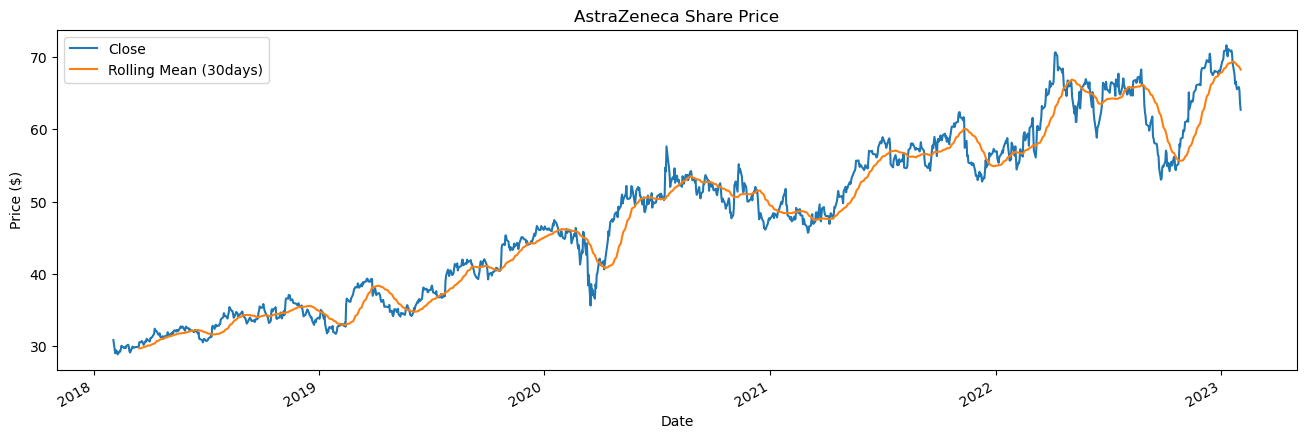

In [45]:
# plot 30 day rolling mean and share price over  5 years
az_df[['Close', 'Rolling Mean (30days)']].plot(label='AstraZenca', figsize=(16,5)) 
plt.title('AstraZeneca Share Price')
plt.ylabel('Price ($)')
plt.show()

### Import data with Webscraping
This section illustrates how import data into Pandas via webscraping
*  2022-2023 Premier League Stats - scrape data from https://fbref.com/en/comps/9/Premier-League-Stats 
*  Two examples created
   *  via pandas read_html
   *  via using the BeautifulSoup and request libraries

In [47]:
# using Pandas to get table data
##  this url contains multiple tables
url = 'https://fbref.com/en/comps/9/Premier-League-Stats' 
dfs = pd.read_html(url)
# print the number of tables found
print(f'Number of tables in dfs {len(dfs)}')

#  get the first table from dfs
prem_table1 = dfs[0]
# print shape
print(prem_table1.shape)
# print first 5 rows
prem_table1.head(10)

Number of tables in dfs 24
(20, 20)


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,19,16,2,1,45,16,29,50,2.63,37.3,17.0,20.3,1.07,W W D W W,60175,Martin Ødegaard - 8,Aaron Ramsdale,NaN
1,2,Manchester City,20,14,3,3,53,20,33,45,2.25,41.4,15.6,25.8,1.29,D W L W W,53185,Erling Haaland - 25,Ederson,NaN
2,3,Newcastle Utd,20,10,9,1,33,11,22,39,1.95,32.8,17.7,15.1,0.75,W D D W D,52187,Miguel Almirón - 9,Nick Pope,NaN
3,4,Manchester Utd,20,12,3,5,32,25,7,39,1.95,29.6,23.5,6.0,0.30,W W W D L,73872,Marcus Rashford - 9,David de Gea,NaN
4,5,Tottenham,21,11,3,7,40,31,9,36,1.71,30.5,25.5,5.0,0.24,L W L L W,61686,Harry Kane - 16,Hugo Lloris,NaN
5,6,Brighton,19,9,4,6,37,27,10,31,1.63,29.1,23.9,5.2,0.27,W L W W D,31474,Leandro Trossard - 7,Robert Sánchez,NaN
6,7,Fulham,21,9,4,8,32,30,2,31,1.48,28.5,35.4,-7.0,-0.33,W W W L L,23270,Aleksandar Mitrović - 11,Bernd Leno,NaN
7,8,Brentford,20,7,9,4,32,28,4,30,1.50,27.4,25.7,1.7,0.09,D W W W D,17079,Ivan Toney - 13,David Raya,NaN
8,9,Liverpool,19,8,5,6,34,25,9,29,1.53,33.5,27.1,6.4,0.34,W W L L D,53228,"Mohamed Salah, Roberto Firmino - 7",Alisson,NaN
9,10,Chelsea,20,8,5,7,22,21,1,29,1.45,23.8,26.4,-2.5,-0.13,D L L W D,39947,Kai Havertz - 5,Kepa Arrizabalaga,NaN


In [48]:
# Another approach to get data from web using the BeautifulSoup and request libraries
#  using the same url as above,  https://fbref.com/en/comps/9/Premier-League-Stats

# get urls with requests
req = requests.get(url) 
#  print  url page response 
print(req) 
# parse content from request to BeautifulSoup
soup = BeautifulSoup(req.content, 'html.parser')

# get all  tables from the url content
tables_list =  soup.find_all('table')
# print number of tables found
print(f'\nNumber of Tables Found: {len(tables_list)}')

# print the id tag of each table
for item in tables_list:
    print (item.get('id')) # print table id tag

<Response [200]>

Number of Tables Found: 24
results2022-202391_overall
results2022-202391_home_away
stats_squads_standard_for
stats_squads_standard_against
stats_squads_keeper_for
stats_squads_keeper_against
stats_squads_keeper_adv_for
stats_squads_keeper_adv_against
stats_squads_shooting_for
stats_squads_shooting_against
stats_squads_passing_for
stats_squads_passing_against
stats_squads_passing_types_for
stats_squads_passing_types_against
stats_squads_gca_for
stats_squads_gca_against
stats_squads_defense_for
stats_squads_defense_against
stats_squads_possession_for
stats_squads_possession_against
stats_squads_playing_time_for
stats_squads_playing_time_against
stats_squads_misc_for
stats_squads_misc_against


In [51]:
#Get a specific table form the url and load data into pandas dataframe

# Find a  a table with a html tag == table, and  get the table with id set to specific table required 
prem_table3_data = soup.find(name='table', id='stats_squads_standard_for') 

# load table into pandas dataframe
prem_table3 = pd.read_html(str(prem_table3_data))[0] 

# print shape of dataframe
print(prem_table3.shape)

# show first 5 rows dataframe 
prem_table3.head(10)

(20, 29)


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl                Age               Poss   
0            Arsenal                 24               24.9               56.8   
1        Aston Villa                 24               27.7               48.7   
2        Bournemouth                 26               26.9               40.6   
3          Brentford                 25               26.8               43.3   
4           Brighton                 23               27.4               57.1   
5            Chelsea                 29               27.8               57.9   
6     Crystal Palace                 21               27.8               45.6   
7            Everton                 28               26.8               46.2   
8             Fulham                 27               28.9               47.2   
9       Leeds United                 26               25.7               50.2   

  Playing Time                    Performance      ... Per 90 Minutes  \
            MP Starts   Min   90s         Gls Ast  ...         G+A-PK   
0           19    209  1710  19.0          43  31  ...           3.84   
1           20    220  1800  20.0          23  15  ...           1.80   
2           20    220  1800  20.0          19  15  ...           1.70   
3           20    220  1800  20.0          31  16  ...           2.10   
4           19    209  1710  19.0          33  20  ...           2.63   
5           20    220  1800  20.0          22  15  ...           1.75   
6           20    220  1800  20.0          17  15  ...           1.60   
7           20    220  1800  20.0          14  11  ...           1.20   
8           21    231  1890  21.0          29  18  ...           2.05   
9           19    209  1710  19.0          25  18  ...           2.21   

  Expected                      Per 90 Minutes                              
        xG  npxG   xAG npxG+xAG             xG   xAG xG+xAG  npxG npxG+xAG  
0     37.3  36.8  26.2     63.0           1.96  1.38   3.34  1.94     3.32  
1     24.6  23.1  17.6     40.7           1.23  0.88   2.11  1.16     2.04  
2     15.2  15.2  12.3     27.5           0.76  0.61   1.37  0.76     1.37  
3     27.4  23.6  16.8     40.3           1.37  0.84   2.21  1.18     2.02  
4     29.1  26.9  21.2     48.1           1.53  1.11   2.65  1.41     2.53  
5     23.8  22.3  18.3     40.7           1.19  0.92   2.11  1.12     2.03  
6     18.3  16.6  14.1     30.7           0.92  0.71   1.62  0.83     1.54  
7     20.4  19.6  14.1     33.7           1.02  0.70   1.72  0.98     1.69  
8     28.5  23.0  16.8     39.8           1.36  0.80   2.15  1.09     1.89  
9     25.8  24.2  17.6     41.8           1.36  0.92   2.28  1.27     2.20  

[10 rows x 29 columns]

## 3. Analyzing data

### Regex to extract a pattern in data 

###  Make use of iterators


###   Merge DataFrames